# Badanie implementacji LBG

In [1]:
import os
import sys
sys.path.append(os.path.realpath('..'))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image

from vector_quantization.metrics import PSNR
from vector_quantization.image import load_image, save_image
from vector_quantization.codebooks import random_codebook
from vector_quantization.vectorize import vectorize, image_from_vectors
from vector_quantization.quantization import quantize, quantize_from_codebook
from vector_quantization.lbg import lbg

Wczytano obrazek i przeprowadzono tworzenie książki kodowej za pomocą LBG o długości książki 512 i 50 iteracji.

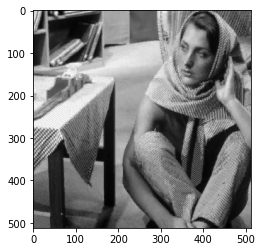

In [2]:
img = load_image("balloon.bmp", "../img/input/")
vectors = vectorize(img, window_size=4)
initial_codebook = random_codebook(vectors, length=512, seed=42)
codebook, distortions = lbg(vectors, initial_codebook, iterations=50, error=0.01)
quantized_img_lbg = image_from_vectors(quantize_from_codebook(vectors, codebook), img.copy())
plt.imshow(quantized_img_lbg, cmap='gray')

Wykreślono wykres błędu globalnego dla każdej iteracji algorytmu LBG

32.14207102005565


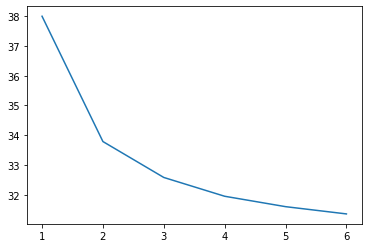

In [3]:
print(PSNR(img, quantized_img_lbg))
plt.plot(distortions)

## Wczytanie wszystkich obrazków i badania

In [4]:
filenames = os.listdir("../img/input/")

from skimage.metrics import structural_similarity, peak_signal_noise_ratio, normalized_root_mse, mean_squared_error

data = {'name': [], 'psnr': [], 'ssim': [], 'mse': [], 'nrmse': [], 'psnr_skimage': [], 'distortions': []}

for filename in filenames:
    print(filename)
    img = load_image(filename, "../img/input/")
    vectors = vectorize(img, window_size=4)
    initial_codebook = random_codebook(vectors, length=32)
    codebook, distortions = lbg(vectors, initial_codebook, iterations=50, error=None)
    quantized_img_lbg = image_from_vectors(quantize_from_codebook(vectors, codebook), img.copy())
    data['name'].append(filename)
    data['psnr'].append(PSNR(img, quantized_img_lbg))
    ssim, _ = structural_similarity(img, quantized_img_lbg, full=True)
    data['ssim'].append(ssim)
    data['mse'].append(mean_squared_error(img, quantized_img_lbg))
    data['nrmse'].append(normalized_root_mse(img, quantized_img_lbg))
    data['psnr_skimage'].append(peak_signal_noise_ratio(img, quantized_img_lbg))
    data['distortions'].append(distortions)


Aerial.bmp
airfield.bmp
airplane.bmp
baboonTMW.bmp
balloon.bmp
balloon_noise.bmp
BARB.bmp
BARB2.bmp
barb512.bmp
BOARD.bmp
boat512.bmp
boats.bmp
bridge.bmp
bridge256.bmp
camera256.bmp
couple.bmp
couple256.bmp
crowd512.bmp
EARTH.bmp
elaine.bmp
ELIF.bmp
finger.bmp
FROG512.BMP
GIRL.bmp
GOLD.bmp
GOLDHILL.BMP
harbour512.bmp
HOTEL.bmp
lax512.bmp
lenaTMW.bmp
lennagrey.bmp
man512.bmp
noisesquare.bmp
OMAHA.bmp
peppersTMW.bmp
SAILBOAT.bmp
seismic.bmp
SENA.bmp
SENSIN.bmp
shapes.bmp
SINAN.bmp
Tank512.bmp
Truck512.bmp
woman1.bmp
woman2.bmp
ZELDA.bmp


In [5]:
df = pd.DataFrame(data=data)
df.to_csv('lbg_4x4_32_e=None.csv')

In [6]:
df

,name,psnr,ssim,mse,nrmse,psnr_skimage,distortions
0,Aerial.bmp,30.308975,0.738150,269.074234,0.088749,23.832082,"[inf, 69.69727060931798, 56.69299499184827, 55..."
1,airfield.bmp,29.847609,0.621790,305.594254,0.112432,23.279352,"[inf, 74.3008857508851, 62.12430869868707, 60...."
2,airplane.bmp,32.766159,0.835739,112.650368,0.057495,27.613477,"[inf, 47.41638311827678, 37.24588878535763, 35..."
3,baboonTMW.bmp,29.225130,0.619144,388.316032,0.145004,22.238950,"[inf, 87.6915102641577, 74.60228421225915, 72...."
4,balloon.bmp,35.504876,0.879501,31.181279,0.050065,33.191864,"[inf, 25.105892364159008, 20.104897344310878, ..."
5,balloon_noise.bmp,35.510646,0.879980,31.957593,0.050894,33.085063,"[inf, 23.230627725504583, 18.87475028217017, 1..."
6,BARB.bmp,30.544723,0.719523,220.033929,0.123536,24.705907,"[inf, 57.95222806383948, 52.51277126150355, 51..."
7,BARB2.bmp,30.739427,0.753790,199.587676,0.112621,25.129466,"[inf, 57.26832340973825, 49.87299026181926, 48..."
8,barb512.bmp,30.336805,0.699047,237.749905,0.119092,24.369600,"[inf, 62.380168231850234, 54.58184461312517, 5..."
9,BOARD.bmp,33.838988,0.850642,74.120845,0.073532,29.431400,"[inf, 33.546115229000904, 27.872283191738546, ..."


In [7]:
df.describe()

,psnr,ssim,mse,nrmse,psnr_skimage
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,31.789057,0.760407,156.117538,0.096147,27.375250
std,1.790807,0.086592,124.768548,0.036366,3.295353
min,28.794700,0.528005,19.705395,0.034543,19.637065
25%,30.731310,0.715557,71.906583,0.072293,24.453677
50%,31.588255,0.763970,115.473608,0.088891,27.507275
75%,32.484114,0.827037,233.320911,0.118888,29.563794
max,35.929998,0.923327,706.925873,0.194422,35.184952


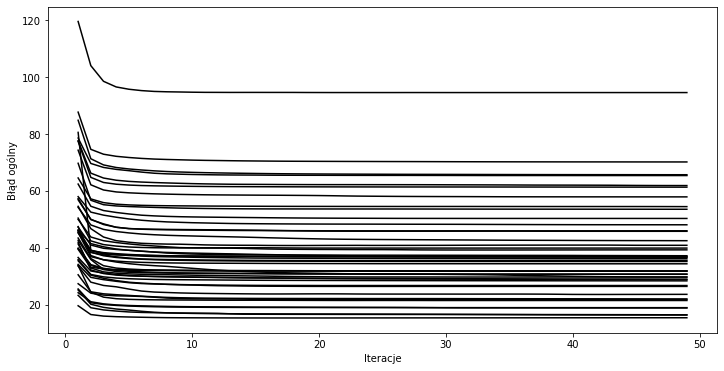

In [8]:
plt.figure(figsize=(12, 6))

for distortions in df['distortions'].tolist():
    plt.plot(distortions, 'k')
    
plt.xlabel('Iteracje')
plt.ylabel('Błąd ogólny')
plt.savefig('lbg_4x4_32_50_iterations.eps')

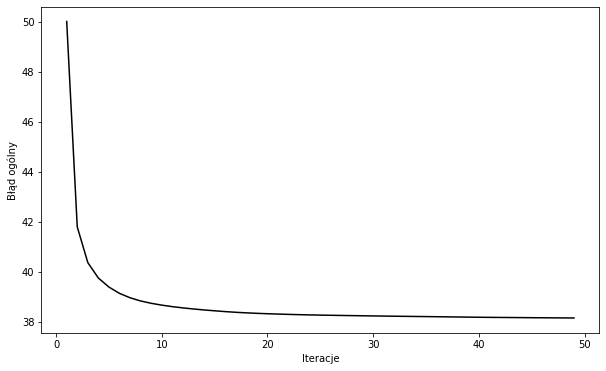

In [9]:
plt.figure(figsize=(10, 6))
mean = np.mean(np.array(df['distortions'].tolist()), axis=0)
plt.plot(mean, 'k')
plt.xlabel('Iteracje')
plt.ylabel('Błąd ogólny')
plt.savefig('lbg_4x4_32_mean_iterations.eps')

## Analiza offline

In [15]:
import pandas as pd
df = pd.read_csv('lbg_4x4_32_e=None.csv')
df

,Unnamed: 0,name,psnr,ssim,mse,nrmse,psnr_skimage,distortions
0,0,Aerial.bmp,30.308975,0.738150,269.074234,0.088749,23.832082,"[inf, 69.69727060931798, 56.69299499184827, 55..."
1,1,airfield.bmp,29.847609,0.621790,305.594254,0.112432,23.279352,"[inf, 74.3008857508851, 62.12430869868707, 60...."
2,2,airplane.bmp,32.766159,0.835739,112.650368,0.057495,27.613477,"[inf, 47.41638311827678, 37.24588878535763, 35..."
3,3,baboonTMW.bmp,29.225130,0.619144,388.316032,0.145004,22.238950,"[inf, 87.6915102641577, 74.60228421225915, 72...."
4,4,balloon.bmp,35.504876,0.879501,31.181279,0.050065,33.191864,"[inf, 25.105892364159008, 20.104897344310878, ..."
5,5,balloon_noise.bmp,35.510646,0.879980,31.957593,0.050894,33.085063,"[inf, 23.230627725504583, 18.87475028217017, 1..."
6,6,BARB.bmp,30.544723,0.719523,220.033929,0.123536,24.705907,"[inf, 57.95222806383948, 52.51277126150355, 51..."
7,7,BARB2.bmp,30.739427,0.753790,199.587676,0.112621,25.129466,"[inf, 57.26832340973825, 49.87299026181926, 48..."
8,8,barb512.bmp,30.336805,0.699047,237.749905,0.119092,24.369600,"[inf, 62.380168231850234, 54.58184461312517, 5..."
9,9,BOARD.bmp,33.838988,0.850642,74.120845,0.073532,29.431400,"[inf, 33.546115229000904, 27.872283191738546, ..."


## Dokumentacja

In [16]:
df_l = df.loc[:, 'name':'nrmse']
df_l.columns = ['Obraz', 'PSNR [dB]', 'SSIM', 'MSE', 'NRMSE']
print(df_l.to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
             Obraz &  PSNR [dB] &      SSIM &         MSE &     NRMSE \\
\midrule
        Aerial.bmp &  30.308975 &  0.738150 &  269.074234 &  0.088749 \\
      airfield.bmp &  29.847609 &  0.621790 &  305.594254 &  0.112432 \\
      airplane.bmp &  32.766159 &  0.835739 &  112.650368 &  0.057495 \\
     baboonTMW.bmp &  29.225130 &  0.619144 &  388.316032 &  0.145004 \\
       balloon.bmp &  35.504876 &  0.879501 &   31.181279 &  0.050065 \\
 balloon\_noise.bmp &  35.510646 &  0.879980 &   31.957593 &  0.050894 \\
          BARB.bmp &  30.544723 &  0.719523 &  220.033929 &  0.123536 \\
         BARB2.bmp &  30.739427 &  0.753790 &  199.587676 &  0.112621 \\
       barb512.bmp &  30.336805 &  0.699047 &  237.749905 &  0.119092 \\
         BOARD.bmp &  33.838988 &  0.850642 &   74.120845 &  0.073532 \\
       boat512.bmp &  31.022867 &  0.725675 &  150.630928 &  0.089032 \\
         boats.bmp &  32.266624 &  0.809828 &   99.350383 &  0.076842 \\
        b

In [17]:
df_summary = df_l.describe().loc[['min', 'max', 'mean']]

In [18]:
df_summary.index = ['Minimum', 'Maksimum', 'Średnia']

In [19]:
print(df_summary.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  PSNR [dB] &      SSIM &         MSE &     NRMSE \\
\midrule
Minimum  &  28.794700 &  0.528005 &   19.705395 &  0.034543 \\
Maksimum &  35.929998 &  0.923327 &  706.925873 &  0.194422 \\
Średnia  &  31.789057 &  0.760407 &  156.117538 &  0.096147 \\
\bottomrule
\end{tabular}

